In [1]:
#!pip install nltk

In [2]:
#!pip install wordcloud

In [3]:
import nltk

In [4]:
#nltk.download()

In [5]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [6]:
reviews = pd.read_csv("K8 Reviews v0.2.csv")

In [7]:
reviews.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


This dataset is scrapped from amazon about Lenevo K8 mobile phones.While the users gave the reviews, they also give the ratings
- Ratings 1,2,3 -> negitive sentiment has a value 0 in the sentiment column
- Ratings 4,5 -> positive sentiment has a value 1 in the sentiment column

In [8]:
reviews.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [9]:
reviews.shape

(14675, 2)

In [10]:
from wordcloud import WordCloud

In [11]:
reviews_combined = " ".join(reviews.review.values)

In [12]:
#Total words in reviews
len(reviews_combined)

1674772

In [13]:
reviews_combined[:200]

'Good but need updates and improvements Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.'

In [14]:
word_cloud = WordCloud().generate_from_text(reviews_combined)

In [15]:
#?WordCloud

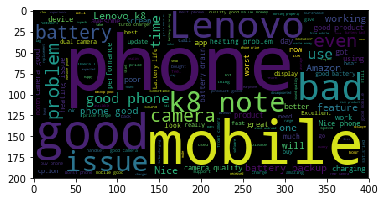

In [16]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

In [17]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

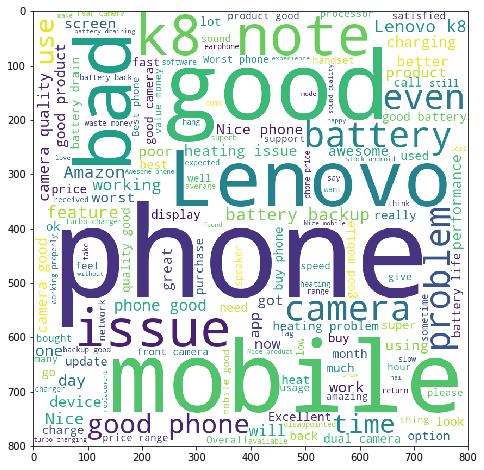

In [18]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [19]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [20]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

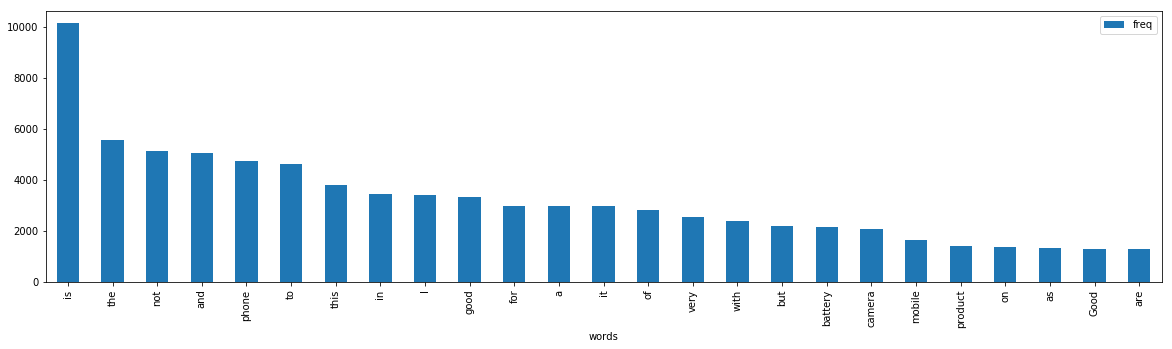

In [21]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

Problems with the above visuals
    1.case is non uniform
    2. punctuations and stop words
    3. words with different tense forms like charged, charging, charges has its root form in charge

In [22]:
#1. case normalization and tokenizing

In [23]:
reviews.review[:10]

0               Good but need updates and improvements
1    Worst mobile i have bought ever, Battery is dr...
2    when I will get my 10% cash back.... its alrea...
3                                                 Good
4    The worst phone everThey have changed the last...
5    Only I'm telling don't buyI'm totally disappoi...
6    Phone is awesome. But while charging, it heats...
7                      The battery level has worn down
8    It's over hitting problems...and phone hanging...
9    A lot of glitches dont buy this thing better g...
Name: review, dtype: object

In [24]:
from nltk.tokenize import word_tokenize

In [25]:
#All Reviews tokenized and in lower case
all_terms = word_tokenize(reviews_combined.lower())

In [26]:
print(all_terms[:20])

['good', 'but', 'need', 'updates', 'and', 'improvements', 'worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup']


In [27]:
len(set(all_terms))

19159

In [28]:
#visualizing the frequency distrinution

In [29]:
from nltk.probability import FreqDist

In [30]:
fdist = FreqDist(all_terms)
fdist

FreqDist({'.': 13530, 'is': 10386, ',': 6890, 'phone': 6565, 'the': 6526, 'not': 6030, 'good': 5717, 'and': 5413, 'it': 5375, 'to': 4697, ...})

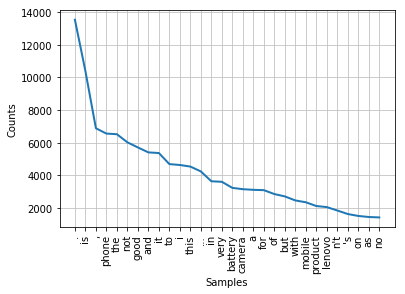

In [31]:
fdist.plot(30,cumulative=False)
plt.show()

In [32]:
from string import punctuation
from nltk.corpus import stopwords

In [33]:
stop_nltk = stopwords.words("english")

In [34]:
stop_updated = stop_nltk + list(punctuation) + ["..."] + ["phone", "mobile"]

below code removes:
1. stopwords, 
2. punct's,
3. custom stop words,
4. words with lenght less than 2

In [35]:
reviews_updated1 = [word for word in all_terms if word not in stop_updated and len(word) > 2]

In [36]:
print(reviews_updated1[:20])

['good', 'need', 'updates', 'improvements', 'worst', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', 'hours', 'internet', 'uses', 'even', 'put', 'idle', 'getting', 'discharged.this']


In [37]:
len(set(reviews_updated1))

18478

In [38]:
from nltk.stem import SnowballStemmer
stemmer_s = SnowballStemmer("english")

In [39]:
reviews_updated_stem = [ stemmer_s.stem(word) for word in reviews_updated1]

In [40]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [41]:
reviews_updated_lemm = [ lemm.lemmatize(word) for word in reviews_updated1]

In [42]:
print(len(set(reviews_updated_stem)),len(set(reviews_updated_lemm)))

16162 17904


In [43]:
#Stememr reduces the number of distinct words in the corpus to a greater exten

In [44]:
#lets build a udf which takes a text as input and does all the above cleaning steps
# one review at a time will be passed from the the reviews column to this function
#based on the outcome of this function, you should be able to add a new column in the data frame
def  clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmed = [stemmer_s.stem(term) for term in tokens 
               if term not in stop_updated and len(term) > 2] 
    res = " ".join(stemmed)
    return res

In [45]:
reviews['clean_review'] = reviews.review.apply(clean_txt)

In [46]:
reviews.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good need updat improv
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..
3,1,Good,good
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...


# Word cloud on cleaned dataset

In [47]:
reviews_combined = " ".join(reviews.clean_review.values)

In [48]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(reviews_combined)

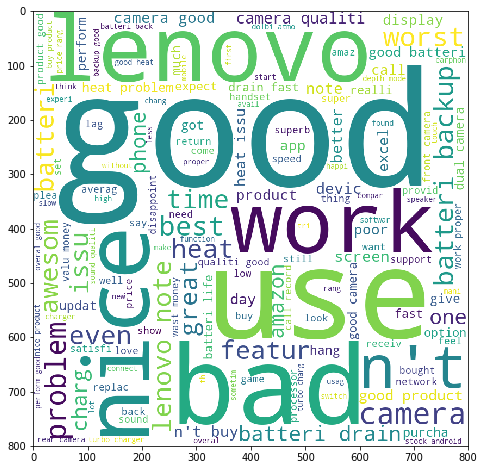

In [49]:
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

# Bar Graph on top 25 words

In [50]:
all_terms = []
fdist = {}
all_terms = reviews_combined.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word,0) + 1

In [51]:
freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)

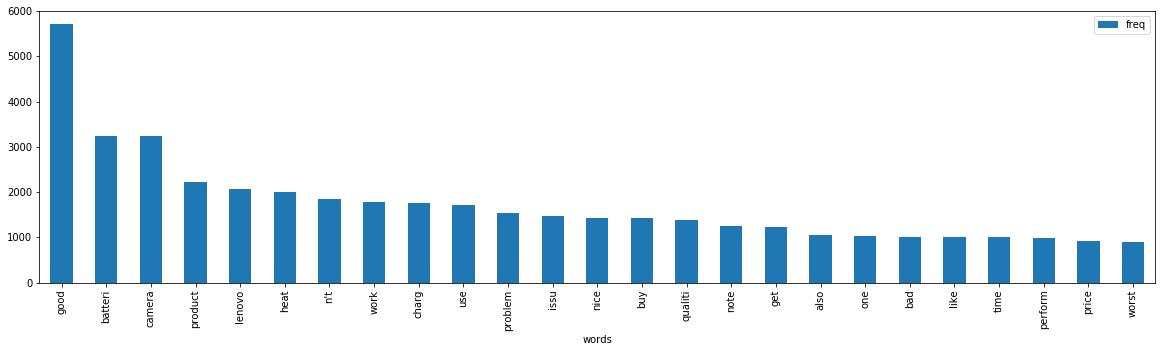

In [52]:
%matplotlib inline
df_dist.sort_values(ascending=False, by="freq").head(25).\
plot.bar(x= "words", y= "freq",figsize=(20,5)) 

# Plot the bar graph for top 25 frequenctly used bigrams

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
# create a bigram count vectorizer object
bigram_count_vectorizer = CountVectorizer(ngram_range=(2,2),max_features = 1500)

In [55]:
X_bigram = bigram_count_vectorizer.fit_transform(reviews['clean_review'])

# Creating a DTM
DTM_bigram = pd.DataFrame(X_bigram.toarray(), columns=bigram_count_vectorizer.get_feature_names())

In [56]:
bigram_count_vectorizer.get_feature_names()[:20]

['100 charg',
 '15w turbo',
 '3gb ram',
 '3rd class',
 '4000 mah',
 '4000mah batteri',
 '4g 4g',
 '4gb ram',
 '5mp camera',
 '64gb intern',
 'abl connect',
 'abl hear',
 'afford price',
 'also bad',
 'also batteri',
 'also camera',
 'also charg',
 'also come',
 'also fast',
 'also get']

In [57]:
DTM_bigram.head()

,100 charg,15w turbo,3gb ram,3rd class,4000 mah,4000mah batteri,4g 4g,4gb ram,5mp camera,64gb intern,...,worst thing,worst use,worst worst,worth buy,worth money,worth price,would like,would recommend,write review,youtub video
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


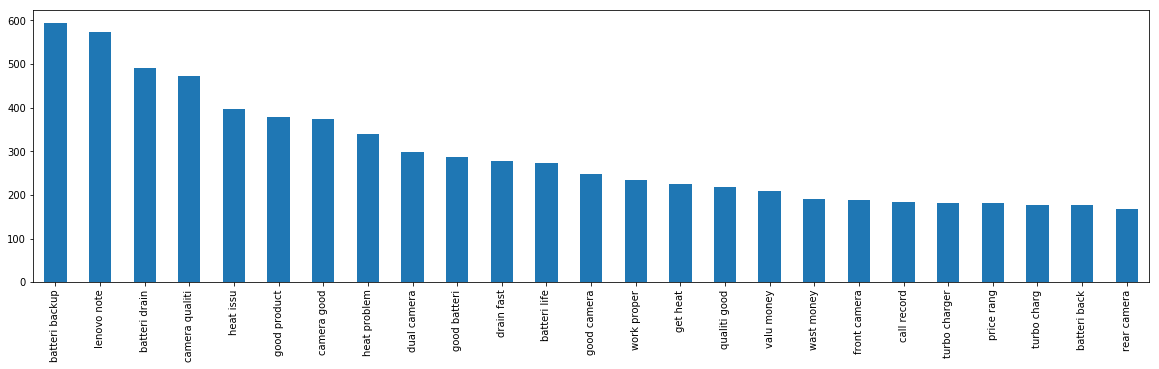

In [58]:
DTM_bigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

In the amazon case study dataset
Find the top 5 relavent reviews which has the below words
 - "battery drain"
 -"Good camera"
If there is a clash in the scores, review at index 0 has higher precedence than at index 1 and so on....

# Sentiment Classification

### Sentiment Prediction Strategy 1: Word based scoring 

In [59]:
afinn = pd.read_csv("AFINN-111.txt", sep="\t", header=None)
afinn.columns = ['Term','Score']
term_scores = dict(afinn.values)

In [60]:
def get_sentiment(sent):
    tokens = word_tokenize(sent.lower())
    score = 0
    for term in tokens:
        score += term_scores.get(term,0)
    return score

In [61]:
reviews['sent_score'] = reviews.clean_review.apply(get_sentiment)

In [62]:
reviews.head()

,sentiment,review,clean_review,sent_score
0,1,Good but need updates and improvements,good need updat improv,3
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0
3,1,Good,good,3
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7


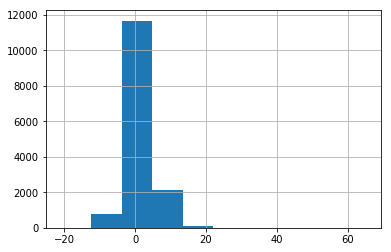

In [63]:
reviews.sent_score.hist()

#sentiment Prediction
    if the sent_score > 0 predicted sentiment is 1
    else the predicted sentiment is 0

In [64]:
reviews['sent_prediction'] = reviews.sent_score.apply(lambda x:1 if x>0 else 0)

In [65]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction
0,1,Good but need updates and improvements,good need updat improv,3,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0
3,1,Good,good,3,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0


In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [67]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction)

array([[5150, 2562],
       [1667, 5296]], dtype=int64)

In [68]:
accuracy_score(reviews.sentiment,reviews.sent_prediction)

0.7118228279386712

### Sentiment Prediction Strategy 2: Using popular package - Vader

In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [70]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [71]:
reviews['score_vader'] = reviews.review.apply(get_vader_sentiment)

In [72]:
reviews['sent_prediction_vader'] = reviews.score_vader.apply(lambda x:1 if x>0.3 else 0)

In [73]:
accuracy_score(reviews.sentiment,reviews.sent_prediction_vader)

0.7990459965928449

In [74]:
confusion_matrix(reviews.sentiment,reviews.sent_prediction_vader)

array([[6301, 1411],
       [1538, 5425]], dtype=int64)

### Sentiment Prediction Strategy : Making our own model

In [90]:
reviews.head()

,sentiment,review,clean_review,sent_score,sent_prediction,score_vader,sent_prediction_vader
0,1,Good but need updates and improvements,good need updat improv,3,1,0.5994,1
1,0,"Worst mobile i have bought ever, Battery is dr...",worst bought ever batteri drain like hell back...,-8,0,-0.8720,0
2,1,when I will get my 10% cash back.... its alrea...,get cash back alreadi january..,0,0,0.0000,0
3,1,Good,good,3,1,0.4404,1
4,0,The worst phone everThey have changed the last...,worst everthey chang last problem still amazon...,-7,0,-0.8289,0


In [76]:
X = reviews.clean_review.values
y = reviews.sentiment.values

In [77]:
y[:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
vectorizer = CountVectorizer(max_features=1500)

In [81]:
# Extarct the features and transform -> get the count of terms in every document
X_train_bow = vectorizer.fit_transform(X_train)

In [82]:
# Only transform -> get the count of terms in every document, the test data

X_test_bow = vectorizer.transform(X_test)

In [83]:
X_train_bow.shape, X_test_bow.shape

((10272, 1500), (4403, 1500))

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
logreg = LogisticRegression()

In [86]:
logreg.fit(X_train_bow,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
y_test_pred = logreg.predict(X_test_bow)

In [88]:
accuracy_score(y_test, y_test_pred)

0.8471496706790824

### Document clustering

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(max_features=150)

In [92]:
X = tfidfvectorizer.fit_transform(reviews['clean_review'])

In [93]:
from sklearn.cluster import KMeans

In [94]:
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [95]:
pred_cluster = km.predict(X)
reviews['cluster_predicted'] = pred_cluster
reviews['cluster_predicted'].value_counts()

3    6840
2    2857
4    2060
0    1401
1     946
5     571
Name: cluster_predicted, dtype: int64

In [97]:
pred_cluster.shape

(14675,)

In [98]:
km.cluster_centers_.shape

(6, 150)

in TFIDF or in DTM every word is a feature
when these words are clustered, the cluster center value for every feature tells us the centeroid of the word relavencies/frequencies.

Higher the cluster centeroid for that feature, higher will be value of word relevency/frequency.

In [103]:
print("Top 5 terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidfvectorizer.get_feature_names()
for i in range(num_clusters):
    print ("Cluster %d:" % i),
    for ind in order_centroids[i, : 5]:
        print (' %s' % terms[ind]),
    print

Top 5 terms per cluster:
Cluster 0:
 good
 product
 price
 one
 batteri
Cluster 1:
 nice
 product
 good
 one
 camera
Cluster 2:
 batteri
 heat
 charg
 problem
 issu
Cluster 3:
 product
 lenovo
 work
 good
 bad
Cluster 4:
 camera
 good
 qualiti
 batteri
 dual
Cluster 5:
 best
 price
 rang
 good
 camera


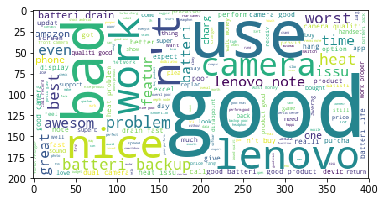

In [100]:
group = reviews[reviews['cluster_predicted'] == 1]
text = ' '.join(reviews['clean_review'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)